In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Load the dataset
file_path = 'INE.csv'  # Change the file path to your actual path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


      NutsID DICOFRE        region_name  year  edu_none  edu_basic  \
0  111160101  160101  Aboim das ChoÃ§as  2019        15         61   
1  111160101  160101  Aboim das ChoÃ§as  2009        30         57   
2  111160101  160101  Aboim das ChoÃ§as  1999        49         73   
3  111160101  160101  Aboim das ChoÃ§as  1989       167         97   
4  111160102  160102             AguiÃ£  2019        24         68   

   edu_secondary  edu_superior  labour_family  labour_holder  ...  olive_area  \
0             11             7             34             15  ...           0   
1              4             4             50             24  ...           0   
2              7             6             62             26  ...           0   
3              4             0            163             70  ...           0   
4              5             2             70             38  ...           1   

   vineyards_area  other_permanent_crop_area  fresh_fruit_holdings  \
0              12     

In [3]:
# Summary statistics for the dataset
summary_stats = data.describe()
print(summary_stats)


               year      edu_none     edu_basic  edu_secondary  edu_superior  \
count  11528.000000  11528.000000  11528.000000    11528.00000  11528.000000   
mean    2004.000000    118.076856    204.742280       28.80465     15.493147   
std       11.180825    163.280984    206.063604       32.19049     19.082666   
min     1989.000000      0.000000      0.000000        0.00000      0.000000   
25%     1996.500000     23.000000     79.000000        9.00000      4.000000   
50%     2004.000000     61.000000    146.000000       19.00000      9.000000   
75%     2011.500000    149.000000    257.000000       37.00000     20.000000   
max     2019.000000   2088.000000   2381.000000      394.00000    212.000000   

       labour_family  labour_holder  labour_spouse  labour_other_family  \
count   11528.000000   11528.000000   11528.000000         11528.000000   
mean      135.850017      67.254511      43.840996            24.859386   
std       151.810015      70.284225      56.570835    

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'INE.csv'  # Ensure the correct file path
data = pd.read_csv(file_path)

# Convert year to a datetime object if it's not already
try:
    data['year'] = pd.to_datetime(data['year'], format='%Y')
except Exception as e:
    print(f"Error converting year to datetime: {e}")

# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Fill missing values with column mean for numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Verify missing values have been filled
missing_values_after_imputation = data.isnull().sum()
print(f"Missing values after imputation:\n{missing_values_after_imputation}")

# Selecting numeric columns for PCA (excluding the year column)
X = data[numeric_cols].drop(columns=['year'])

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Adding the year to the PCA dataframe
pc_df['year'] = data['year'].dt.year

# Plotting PCA results
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PC1', y='PC2', hue='year', palette='coolwarm', data=pc_df)
plt.title('PCA of Agro-Environmental Data')
plt.show()


Missing values in each column:
NutsID                           0
DICOFRE                          0
region_name                      0
year                             0
edu_none                         0
                                ..
fruit_holdings                   0
nuts_holdings                    0
olive_holdings                   0
vineyard_holdings                0
other_permanent_crop_holdings    0
Length: 62, dtype: int64
Missing values after imputation:
NutsID                           0
DICOFRE                          0
region_name                      0
year                             0
edu_none                         0
                                ..
fruit_holdings                   0
nuts_holdings                    0
olive_holdings                   0
vineyard_holdings                0
other_permanent_crop_holdings    0
Length: 62, dtype: int64


KeyError: "['year'] not found in axis"

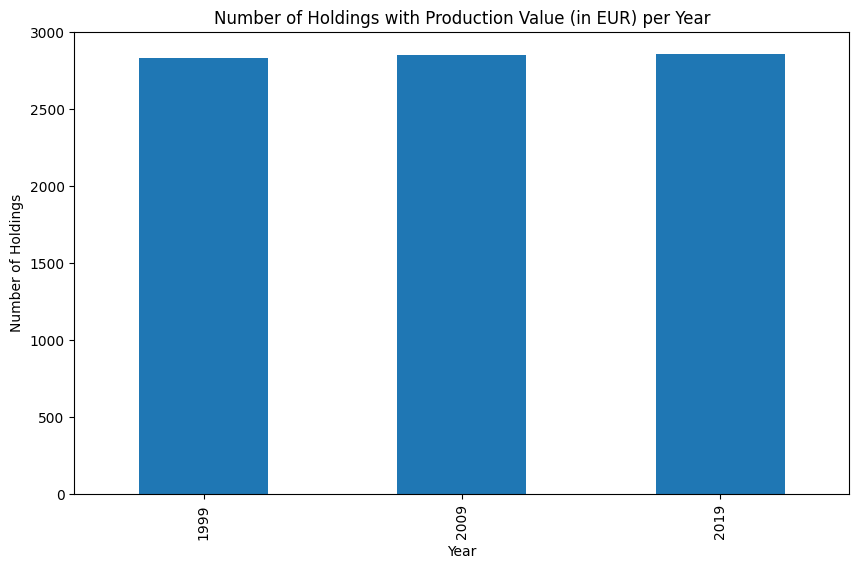

In [3]:
# Filter rows where production_eur > 0
df_production = df[df['production_eur'] > 0]

# Count the number of holdings per year
holdings_per_year = df_production.groupby('year').size()

# Plot the number of holdings per year
plt.figure(figsize=(10, 6))
holdings_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Holdings')
plt.title('Number of Holdings with Production Value (in EUR) per Year')
plt.show()


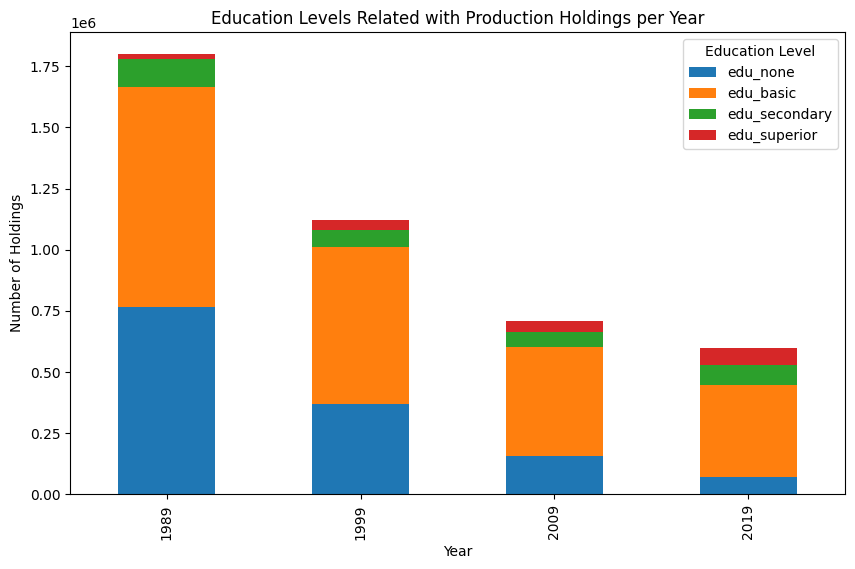

In [4]:
# Group by year and sum the education columns
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
edu_per_year = df.groupby('year')[edu_columns].sum()

# Plot the education levels per year
edu_per_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Holdings')
plt.title('Education Levels Related with Production Holdings per Year')
plt.legend(title='Education Level')
plt.show()


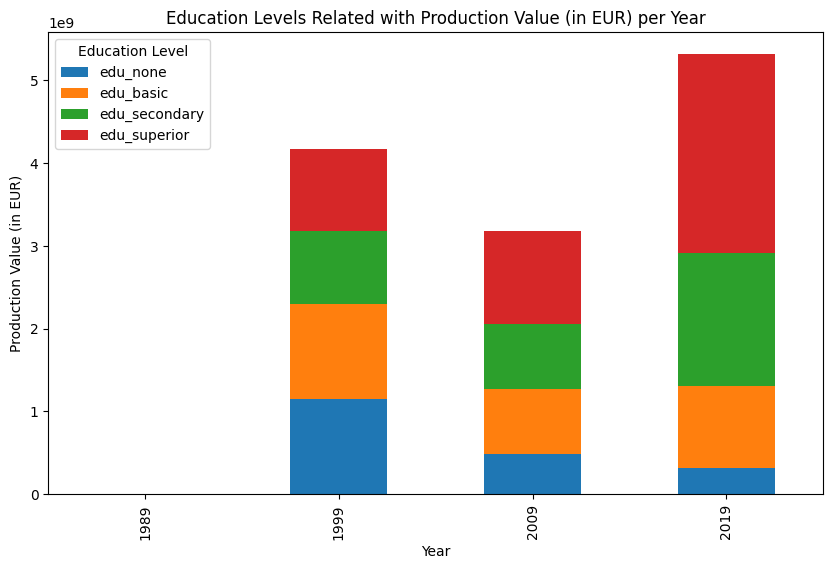

In [5]:
# Calculate the sum of production_eur for each education level per year
edu_production_value = df.groupby('year')[edu_columns + ['production_eur']].sum()

# Normalize by the total production value to get the proportion of each education level
for col in edu_columns:
    edu_production_value[col] = edu_production_value[col] * edu_production_value['production_eur'] / edu_production_value[col].sum()

# Drop the total production_eur column as we now have normalized values
edu_production_value = edu_production_value.drop(columns=['production_eur'])

# Plot the education levels related to production value per year
edu_production_value.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Production Value (in EUR)')
plt.title('Education Levels Related with Production Value (in EUR) per Year')
plt.legend(title='Education Level')
plt.show()


can you algo make a relation for all diferent crops of the holdings vrs the areas?

In [6]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('INE.csv')

# List of crop area columns
crop_area_columns = [
    'cereals_area', 'dried_pulses_area', 'grasses_area', 'fodder_area', 
    'potatoes_area', 'sugarbeets_area', 'industrial_crops_area', 'fresh_veg_area', 
    'flowers_area', 'other_temp_crops_area', 'fresh_fruit_area', 'citrus_area', 
    'fruit_area', 'nuts_area', 'olive_area', 'vineyards_area', 'other_permanent_crop_area'
]


In [11]:
# Calculate the number of holdings per crop (count non-zero entries)
crop_holdings_counts = df[crop_area_columns].apply(lambda x: x.gt(0).sum())

# Calculate the total area per crop
crop_area_sums = df[crop_area_columns].sum()


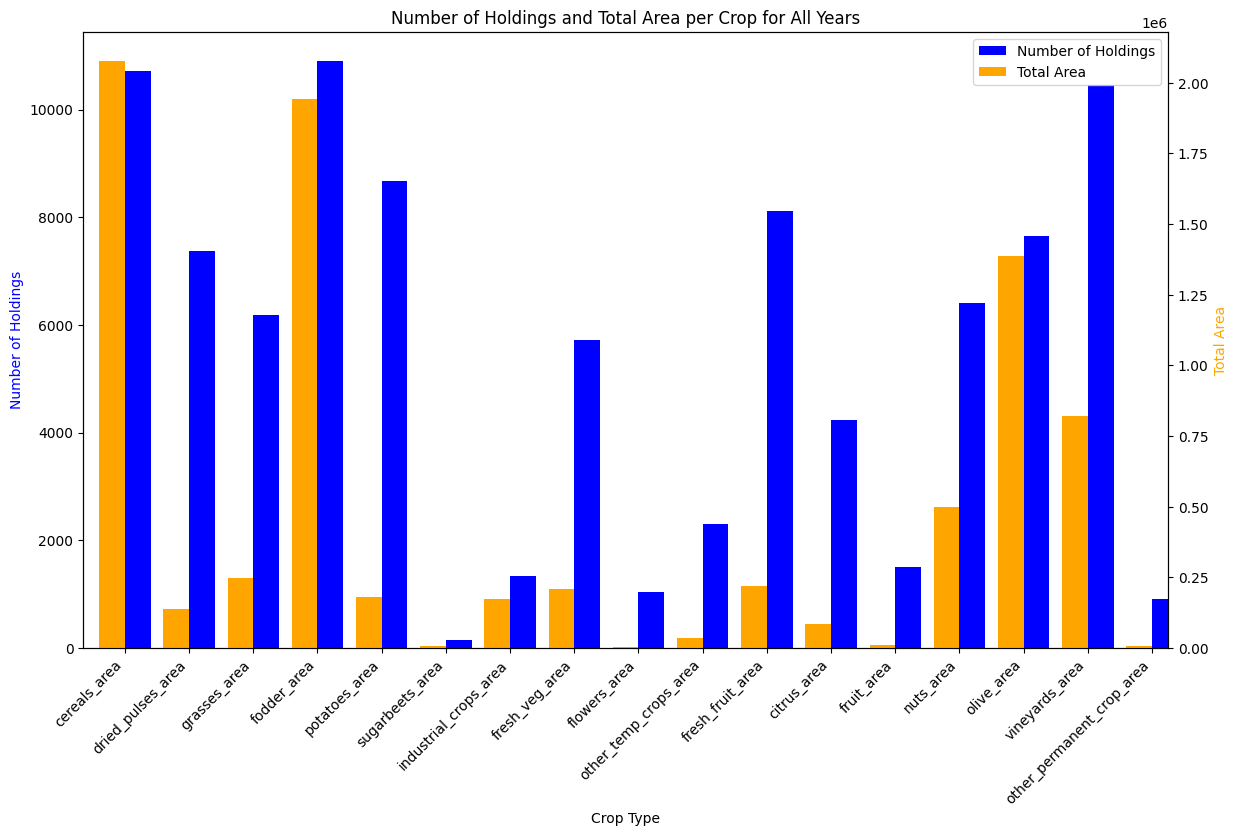

In [12]:
import matplotlib.ticker as mtick

# Create a DataFrame for plotting
crop_data = pd.DataFrame({
    'Number of Holdings': crop_holdings_counts,
    'Total Area': crop_area_sums
})

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the number of holdings
crop_data['Number of Holdings'].plot(kind='bar', color='blue', ax=ax1, position=0, width=0.4, label='Number of Holdings')

# Create a second y-axis for the total area
ax2 = ax1.twinx()
crop_data['Total Area'].plot(kind='bar', color='orange', ax=ax2, position=1, width=0.4, label='Total Area')

# Labeling
ax1.set_xlabel('Crop Type')
ax1.set_ylabel('Number of Holdings', color='blue')
ax2.set_ylabel('Total Area', color='orange')
ax1.set_title('Number of Holdings and Total Area per Crop for All Years')

# Aligning the x-axis ticks with the bars
ax1.set_xticklabels(crop_data.index, rotation=45, ha='right')

# Adding the legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()


2 tentativa

In [13]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('INE.csv')

# List of crop area columns
crop_area_columns = [
    'cereals_area', 'dried_pulses_area', 'grasses_area', 'fodder_area', 
    'potatoes_area', 'sugarbeets_area', 'industrial_crops_area', 'fresh_veg_area', 
    'flowers_area', 'other_temp_crops_area', 'fresh_fruit_area', 'citrus_area', 
    'fruit_area', 'nuts_area', 'olive_area', 'vineyards_area', 'other_permanent_crop_area'
]

# Create a DataFrame to store the results
results = []

# Calculate the number of holdings and total area per crop for each year
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    holdings_counts = year_data[crop_area_columns].apply(lambda x: x.gt(0).sum())
    area_sums = year_data[crop_area_columns].sum()
    
    year_results = pd.DataFrame({
        'Crop': crop_area_columns,
        'Year': year,
        'Number of Holdings': holdings_counts,
        'Total Area': area_sums
    })
    
    results.append(year_results)

# Concatenate all the yearly results into a single DataFrame
results_df = pd.concat(results)


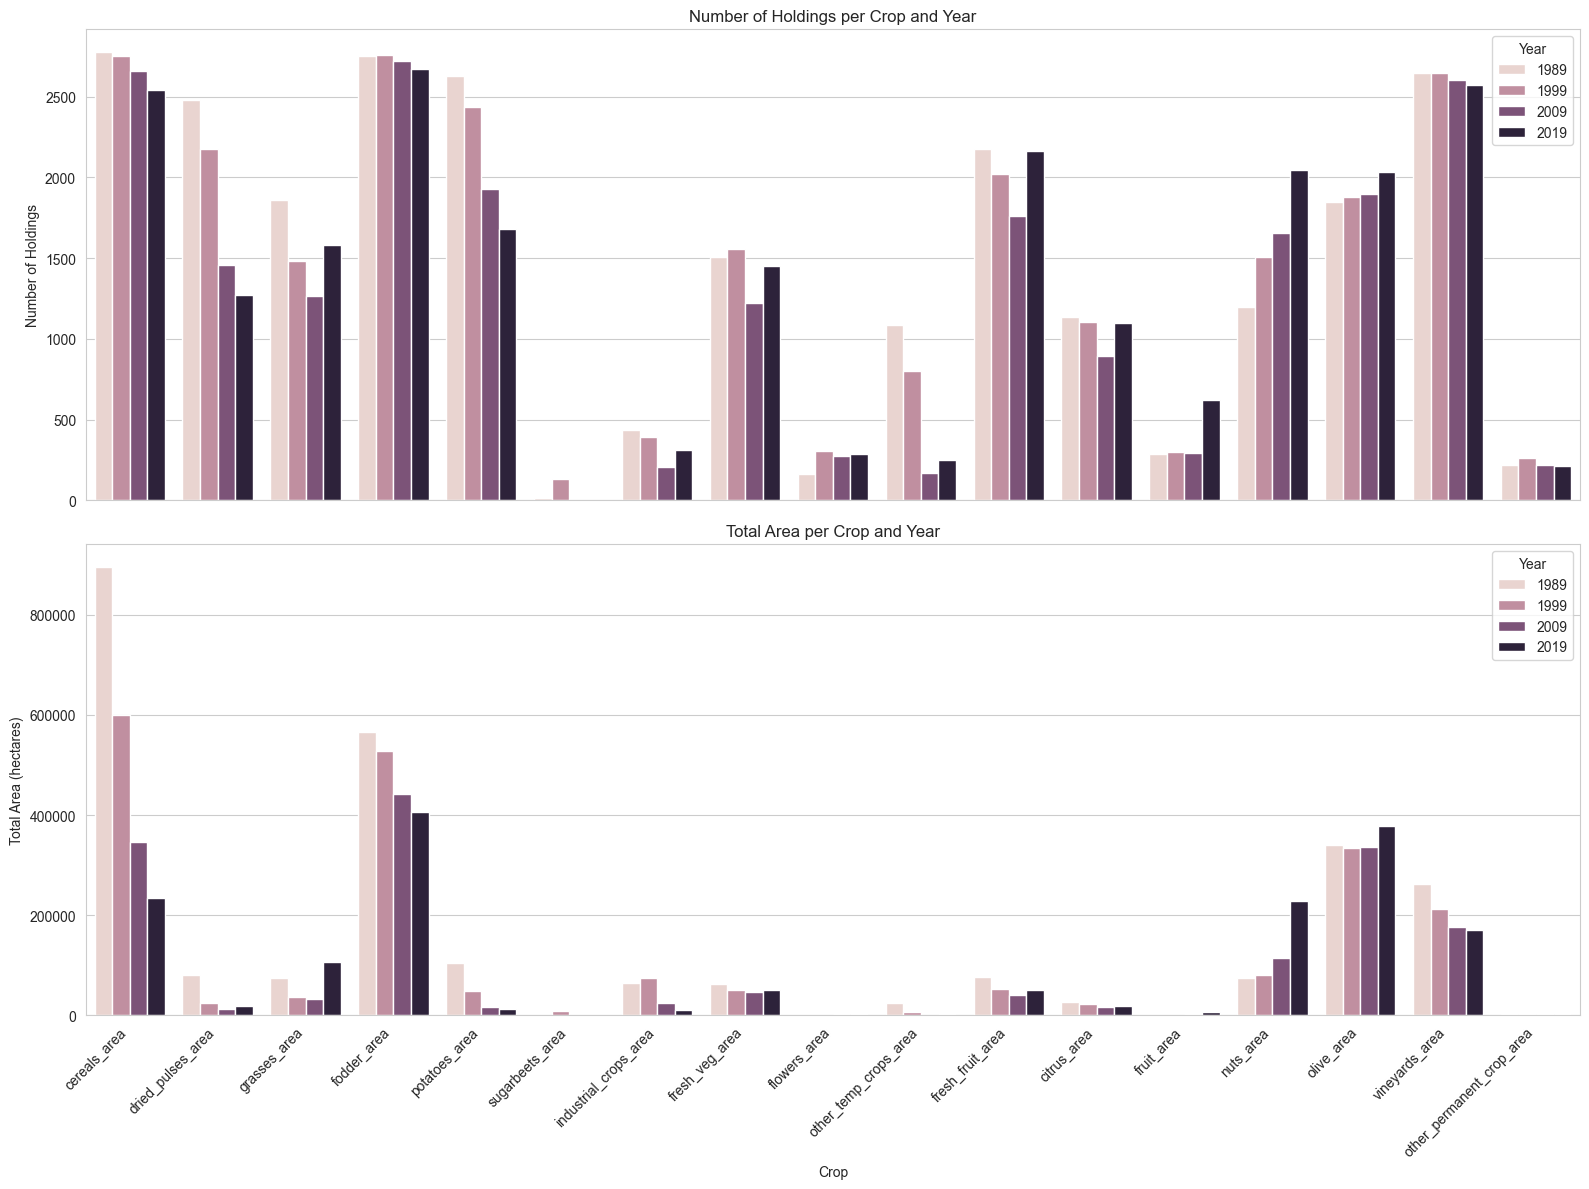

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), sharex=True)

# Plot the number of holdings per crop and year
sns.barplot(
    x='Crop', y='Number of Holdings', hue='Year', data=results_df, ax=axes[0]
)
axes[0].set_title('Number of Holdings per Crop and Year')
axes[0].set_ylabel('Number of Holdings')
axes[0].legend(title='Year')

# Plot the total area per crop and year
sns.barplot(
    x='Crop', y='Total Area', hue='Year', data=results_df, ax=axes[1]
)
axes[1].set_title('Total Area per Crop and Year')
axes[1].set_ylabel('Total Area (hectares)')
axes[1].legend(title='Year')

# Set x-axis labels and rotate them for better readability
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\diana\AppData\Local\Temp\ipykernel_16624\2425720298.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


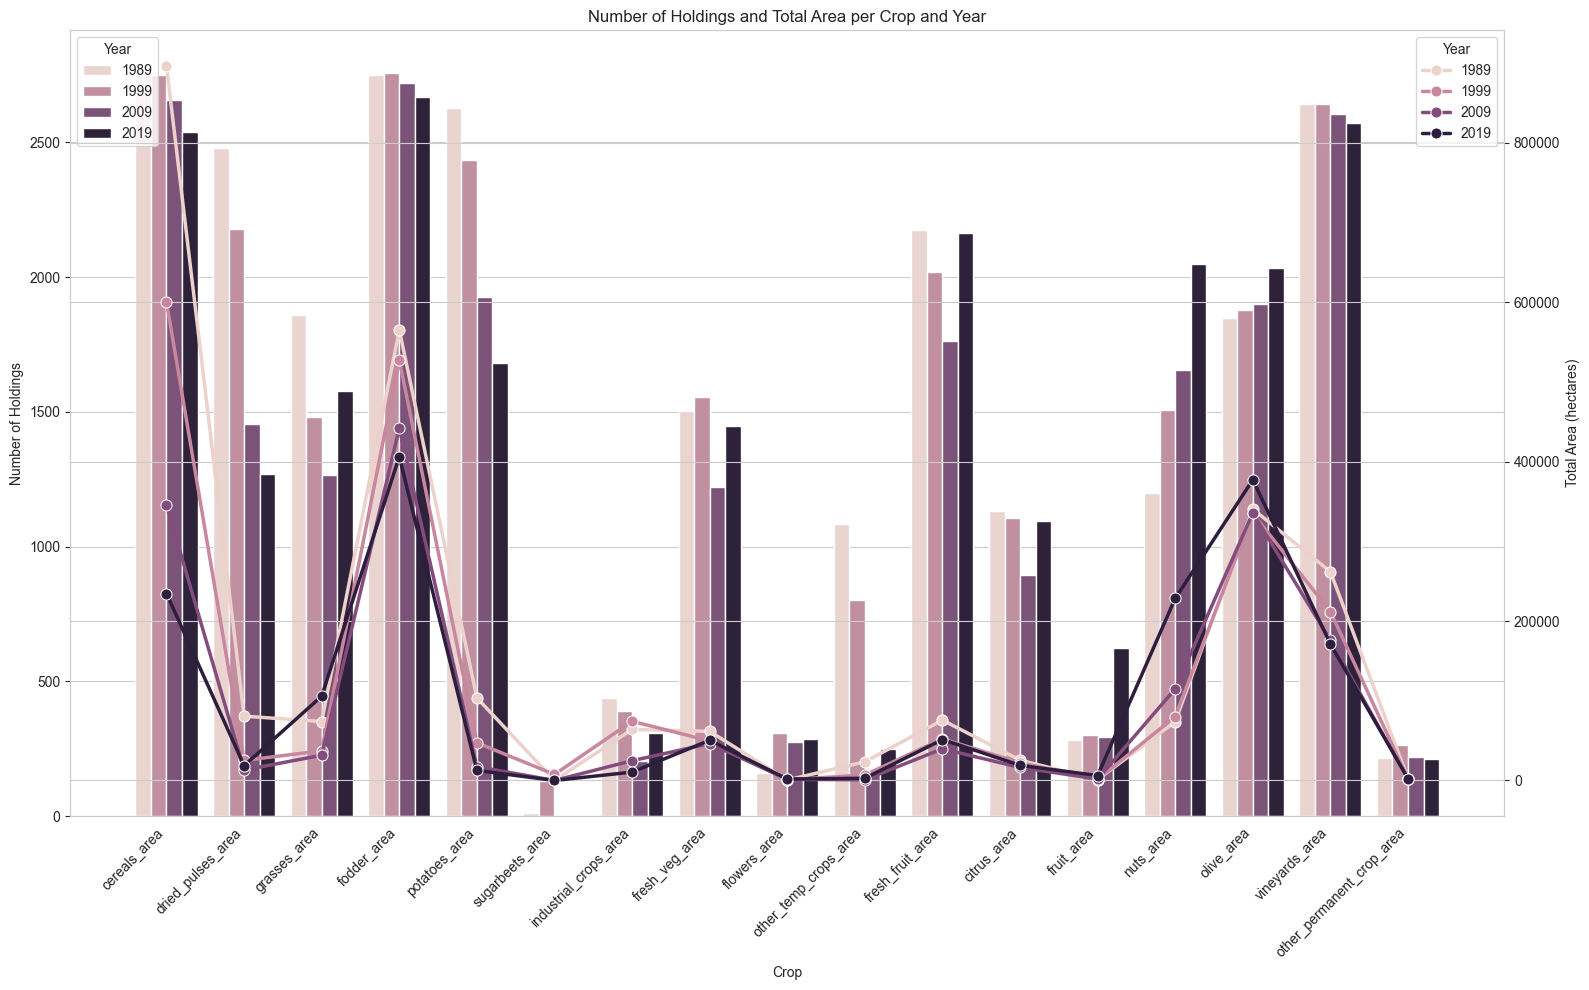

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file and process data (as per your provided snippet)
df = pd.read_csv('INE.csv')
crop_area_columns = [
    'cereals_area', 'dried_pulses_area', 'grasses_area', 'fodder_area', 
    'potatoes_area', 'sugarbeets_area', 'industrial_crops_area', 'fresh_veg_area', 
    'flowers_area', 'other_temp_crops_area', 'fresh_fruit_area', 'citrus_area', 
    'fruit_area', 'nuts_area', 'olive_area', 'vineyards_area', 'other_permanent_crop_area'
]

results = []

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    holdings_counts = year_data[crop_area_columns].apply(lambda x: x.gt(0).sum())
    area_sums = year_data[crop_area_columns].sum()
    
    year_results = pd.DataFrame({
        'Crop': crop_area_columns,
        'Year': year,
        'Number of Holdings': holdings_counts,
        'Total Area': area_sums
    })
    
    results.append(year_results)

results_df = pd.concat(results)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot the number of holdings per crop and year as a bar plot
sns.barplot(
    x='Crop', y='Number of Holdings', hue='Year', data=results_df, ax=ax1
)
ax1.set_title('Number of Holdings and Total Area per Crop and Year')
ax1.set_ylabel('Number of Holdings')
ax1.legend(title='Year', loc='upper left')

# Create a twin axis for the total area and plot it as a line plot
ax2 = ax1.twinx()
sns.lineplot(
    x='Crop', y='Total Area', hue='Year', data=results_df, ax=ax2, 
    linewidth=2.5, linestyle='-', marker='o', markersize=8
)
ax2.set_ylabel('Total Area (hectares)')
ax2.legend(title='Year', loc='upper right')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('INE.csv')

# List of education columns
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Create a DataFrame to store the results
results = []

# Calculate the counts of education levels per year
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    edu_counts = year_data[edu_columns].sum()
    
    year_results = pd.DataFrame({
        'Education Level': edu_columns,
        'Year': year,
        'Count': edu_counts
    })
    
    results.append(year_results)

# Concatenate all the yearly results into a single DataFrame
results_df = pd.concat(results)


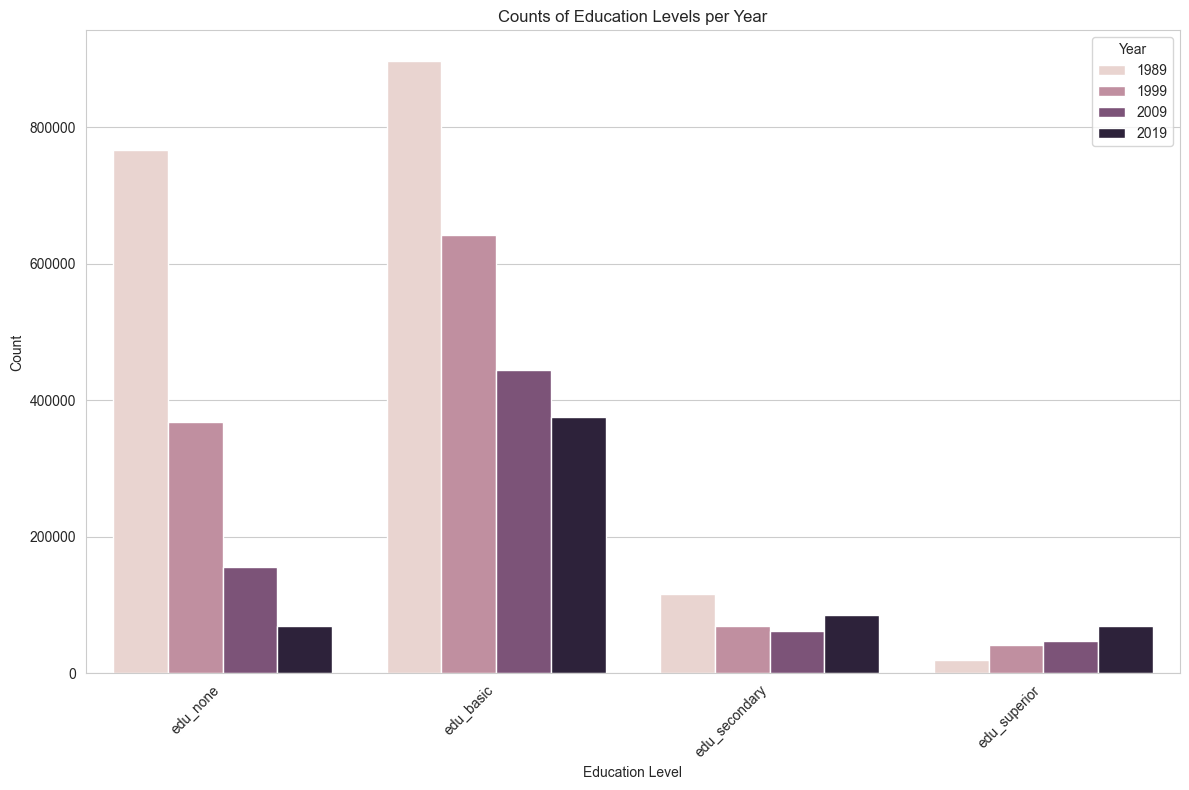

In [17]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# Plot the counts of education levels per year
sns.barplot(
    x='Education Level', y='Count', hue='Year', data=results_df
)
plt.title('Counts of Education Levels per Year')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('INE.csv')

# List of education columns
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Assuming 'region_name' is the column representing regions
regions = df['region_name'].unique()

# Create a DataFrame to store the results
results = []

# Calculate the counts of education levels per region and year
for region in regions:
    region_data = df[df['region_name'] == region]
    
    for year in region_data['year'].unique():
        year_data = region_data[region_data['year'] == year]
        edu_counts = year_data[edu_columns].sum()
        
        year_results = pd.DataFrame({
            'Education Level': edu_columns,
            'Year': year,
            'Region': region,
            'Count': edu_counts
        })
        
        results.append(year_results)

# Concatenate all the results into a single DataFrame
results_df = pd.concat(results)


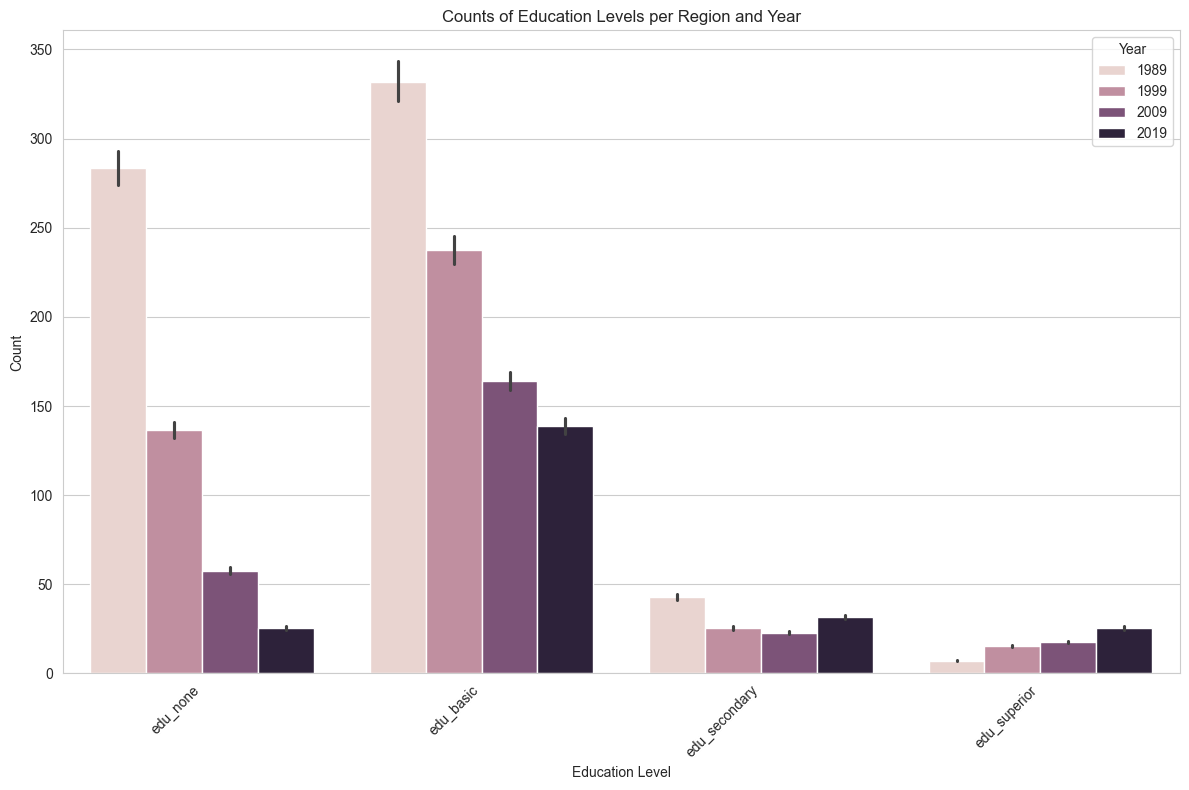

In [19]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# Plot the counts of education levels per region and year
sns.barplot(
    x='Education Level', y='Count', hue='Year', data=results_df
)
plt.title('Counts of Education Levels per Region and Year')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [20]:
# Assuming you already have this part of the code
# Calculate the sum of production_eur for each education level per year
edu_production_value = df.groupby('year')[edu_columns + ['production_eur']].sum()

# Normalize by the total production value to get the proportion of each education level
for col in edu_columns:
    edu_production_value[col] = edu_production_value[col] * edu_production_value['production_eur'] / edu_production_value[col].sum()

# Drop the total production_eur column as we now have normalized values
edu_production_value = edu_production_value.drop(columns=['production_eur'])


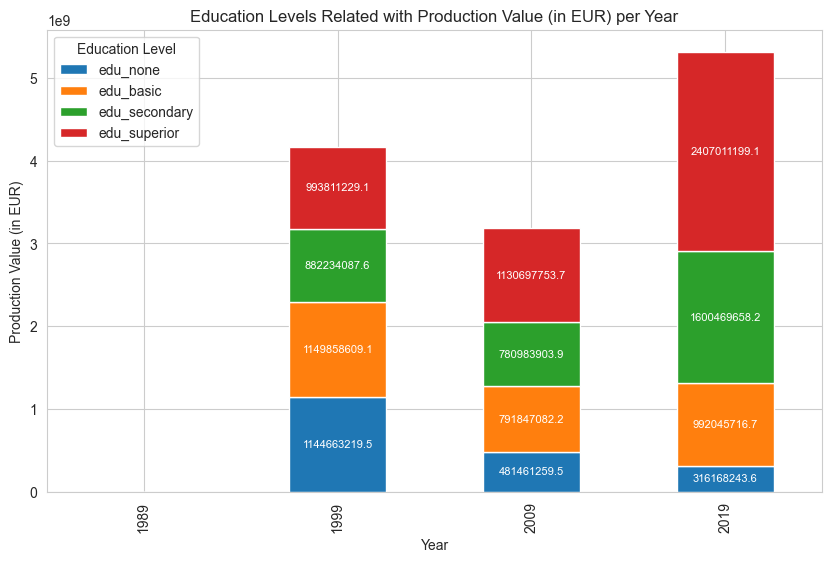

In [21]:
import matplotlib.pyplot as plt

# Plot the education levels related to production value per year
ax = edu_production_value.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Production Value (in EUR)')
plt.title('Education Levels Related with Production Value (in EUR) per Year')
plt.legend(title='Education Level')

# Add annotations (values or percentages) to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Exclude zero height bars
        if width > 0:  # Stacked bars might have zero width if not visible
            label = "{:.1f}%".format(height * 100) if height < 1 else "{:.1f}".format(height)
        else:
            label = "{:.1f}%".format(width * 100) if width < 1 else "{:.1f}".format(width)
        ax.annotate(label, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8, color='white')

plt.show()


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('INE.csv')

# Ensure the column names are as expected
print(df.columns)

# Aggregate the total production value for each year
yearly_production = df.groupby('year')['production_eur'].sum().reset_index()


Index(['NutsID', 'DICOFRE', 'region_name', 'year', 'edu_none', 'edu_basic',
       'edu_secondary', 'edu_superior', 'labour_family', 'labour_holder',
       'labour_spouse', 'labour_other_family', 'labour_non_family',
       'labour_regular', 'labour_non_regular', 'labour_not_hired',
       'production_eur', 'production_area', 'livestock_cattle',
       'livestock_pigs', 'livestock_sheep', 'livestock_goats',
       'livestock_equidae', 'livestock_poultry', 'livestock_rabbits',
       'livestock_hives', 'grassland_area', 'grassland_holdings',
       'cereals_area', 'dried_pulses_area', 'grasses_area', 'fodder_area',
       'potatoes_area', 'sugarbeets_area', 'industrial_crops_area',
       'fresh_veg_area', 'flowers_area', 'other_temp_crops_area',
       'cereals_area.1', 'dried_pulses_area.1', 'grasses_area.1',
       'fodder_area.1', 'potatoes_area.1', 'sugarbeets_area.1',
       'industrial_crops_area.1', 'fresh_veg_area.1', 'flowers_area.1',
       'other_temp_crops_area.1', 'fresh_

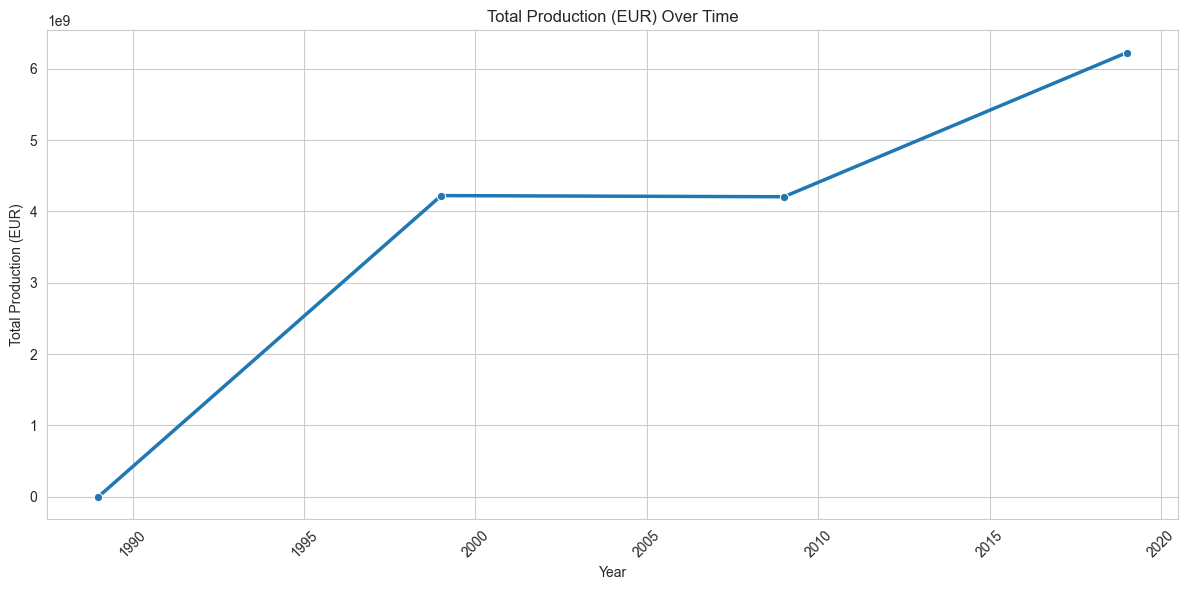

In [29]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a line plot for total production values over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_production,
    x='year',
    y='production_eur',
    marker='o',
    linewidth=2.5
)

# Set titles and labels
plt.title('Total Production (EUR) Over Time')
plt.xlabel('Year')
plt.ylabel('Total Production (EUR)')
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('INE.csv')

# Ensure the column names are as expected
print(df.columns)

# Aggregate the total production value and total production area for each year
yearly_data = df.groupby('year')[['production_eur', 'production_area']].sum().reset_index()


Index(['NutsID', 'DICOFRE', 'region_name', 'year', 'edu_none', 'edu_basic',
       'edu_secondary', 'edu_superior', 'labour_family', 'labour_holder',
       'labour_spouse', 'labour_other_family', 'labour_non_family',
       'labour_regular', 'labour_non_regular', 'labour_not_hired',
       'production_eur', 'production_area', 'livestock_cattle',
       'livestock_pigs', 'livestock_sheep', 'livestock_goats',
       'livestock_equidae', 'livestock_poultry', 'livestock_rabbits',
       'livestock_hives', 'grassland_area', 'grassland_holdings',
       'cereals_area', 'dried_pulses_area', 'grasses_area', 'fodder_area',
       'potatoes_area', 'sugarbeets_area', 'industrial_crops_area',
       'fresh_veg_area', 'flowers_area', 'other_temp_crops_area',
       'cereals_area.1', 'dried_pulses_area.1', 'grasses_area.1',
       'fodder_area.1', 'potatoes_area.1', 'sugarbeets_area.1',
       'industrial_crops_area.1', 'fresh_veg_area.1', 'flowers_area.1',
       'other_temp_crops_area.1', 'fresh_

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('INE.csv')

# Inspect the data to understand its structure
print(df.head())
print(df.columns)


      NutsID DICOFRE        region_name  year  edu_none  edu_basic  \
0  111160101  160101  Aboim das ChoÃ§as  2019        15         61   
1  111160101  160101  Aboim das ChoÃ§as  2009        30         57   
2  111160101  160101  Aboim das ChoÃ§as  1999        49         73   
3  111160101  160101  Aboim das ChoÃ§as  1989       167         97   
4  111160102  160102             AguiÃ£  2019        24         68   

   edu_secondary  edu_superior  labour_family  labour_holder  ...  olive_area  \
0             11             7             34             15  ...           0   
1              4             4             50             24  ...           0   
2              7             6             62             26  ...           0   
3              4             0            163             70  ...           0   
4              5             2             70             38  ...           1   

   vineyards_area  other_permanent_crop_area  fresh_fruit_holdings  \
0              12     

In [34]:
# Aggregate the total production value and total production area for each year
yearly_data = df.groupby('year')[['production_eur', 'production_area']].sum().reset_index()

# Check the aggregated data
print(yearly_data)


   year  production_eur  production_area
0  1989    0.000000e+00              0.0
1  1999    4.222161e+09        7391464.4
2  2009    4.206204e+09        8438834.5
3  2019    6.227247e+09       11322295.2


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('INE.csv')

# Inspect the data to understand its structure
print(df.head())
print(df.columns)


      NutsID DICOFRE        region_name  year  edu_none  edu_basic  \
0  111160101  160101  Aboim das ChoÃ§as  2019        15         61   
1  111160101  160101  Aboim das ChoÃ§as  2009        30         57   
2  111160101  160101  Aboim das ChoÃ§as  1999        49         73   
3  111160101  160101  Aboim das ChoÃ§as  1989       167         97   
4  111160102  160102             AguiÃ£  2019        24         68   

   edu_secondary  edu_superior  labour_family  labour_holder  ...  olive_area  \
0             11             7             34             15  ...           0   
1              4             4             50             24  ...           0   
2              7             6             62             26  ...           0   
3              4             0            163             70  ...           0   
4              5             2             70             38  ...           1   

   vineyards_area  other_permanent_crop_area  fresh_fruit_holdings  \
0              12     

In [37]:
# Aggregate the total production area for each year
yearly_data = df.groupby('year')['production_area'].sum().reset_index()

# Check the aggregated data
print(yearly_data)


   year  production_area
0  1989              0.0
1  1999        7391464.4
2  2009        8438834.5
3  2019       11322295.2


C:\Users\diana\AppData\Local\Temp\ipykernel_16624\2117977741.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


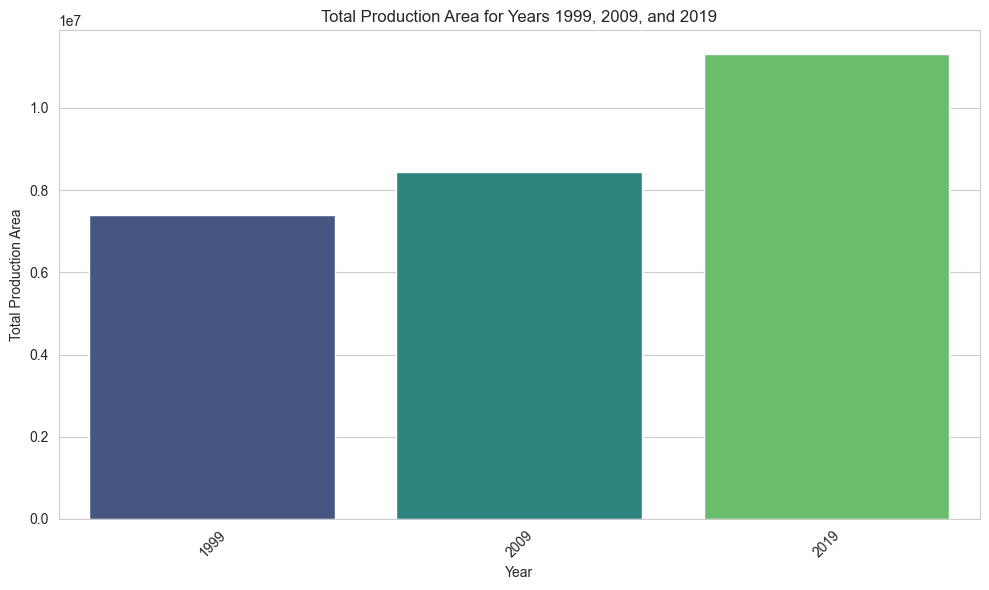

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('INE.csv')

# Filter data for specific years
filtered_data = df[df['year'].isin([1999, 2009, 2019])]

# Aggregate the total production area for each year
yearly_data = filtered_data.groupby('year')['production_area'].sum().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for total production area for the specific years
plt.figure(figsize=(10, 6))

# Plot total production area
sns.barplot(
    data=yearly_data,
    x='year',
    y='production_area',
    palette='viridis'
)

# Set titles and labels
plt.title('Total Production Area for Years 1999, 2009, and 2019')
plt.xlabel('Year')
plt.ylabel('Total Production Area')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\diana\AppData\Local\Temp\ipykernel_16624\2237037061.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


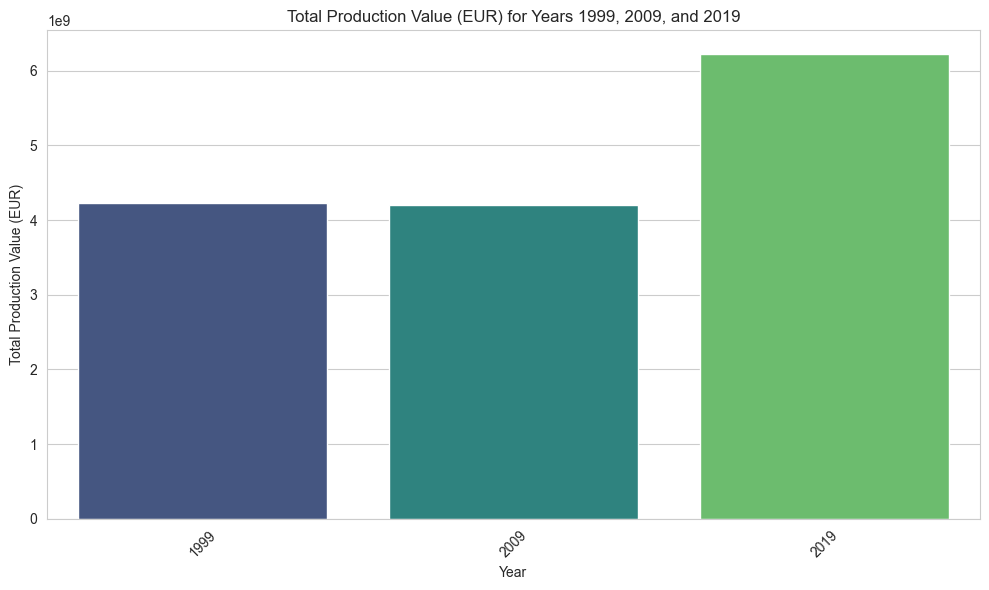

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('INE.csv')

# Filter data for specific years
filtered_data = df[df['year'].isin([1999, 2009, 2019])]

# Aggregate the total production value for each year
yearly_data = filtered_data.groupby('year')['production_eur'].sum().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for total production value for the specific years
plt.figure(figsize=(10, 6))

# Plot total production value
sns.barplot(
    data=yearly_data,
    x='year',
    y='production_eur',
    palette='viridis'
)

# Set titles and labels
plt.title('Total Production Value (EUR) for Years 1999, 2009, and 2019')
plt.xlabel('Year')
plt.ylabel('Total Production Value (EUR)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


      edu_none  edu_basic  edu_secondary  edu_superior  production_eur  \
year                                                                     
1989    767242     897131         115677         19517    0.000000e+00   
1999    369030     642793          69385         42040    4.222161e+09   
2009    155808     444337          61655         48012    4.206204e+09   
2019     69110     376008          85343         69036    6.227247e+09   

      edu_none_perc  edu_basic_perc  edu_secondary_perc  edu_superior_perc  
year                                                                        
1989      42.634812       49.852603            6.428046           1.084539  
1999      32.853831       57.226276            6.177175           3.742718  
2009      21.950601       62.599252            8.686103           6.764045  
2019      11.527998       62.720581           14.235768          11.515654  
                edu_none  edu_basic  edu_secondary  edu_superior  \
edu_none        1.000000 

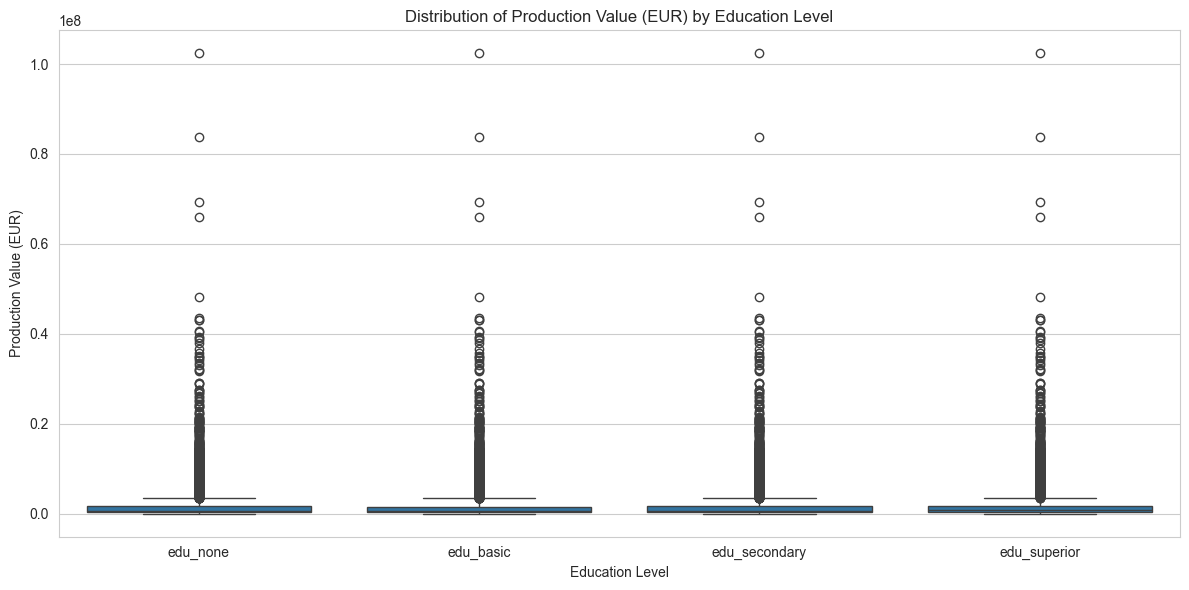

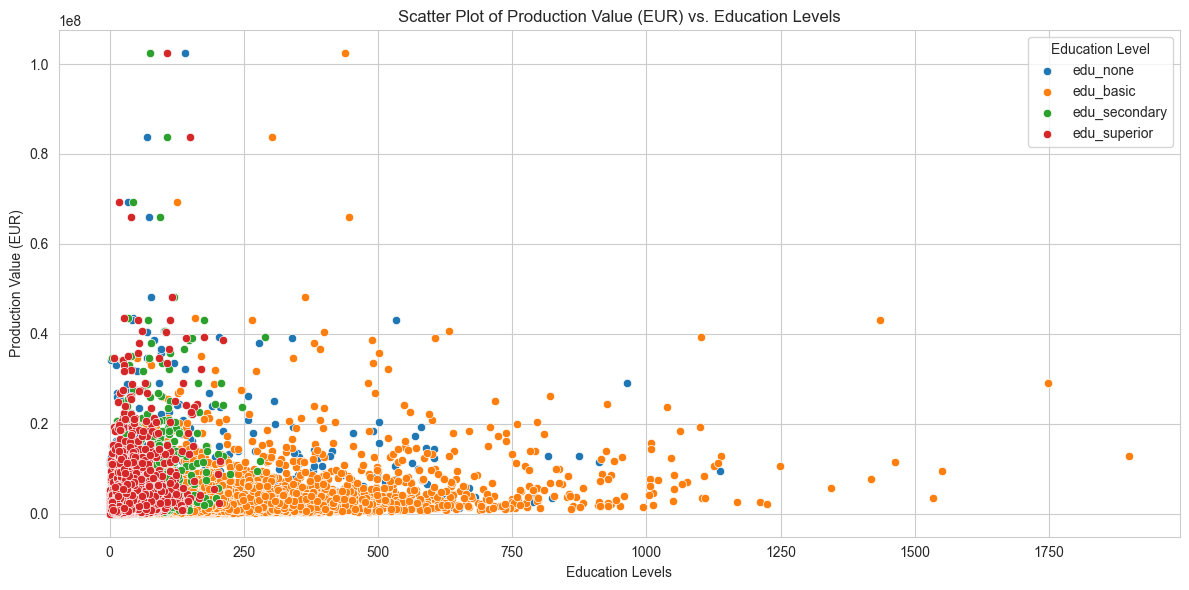

                            OLS Regression Results                            
Dep. Variable:         production_eur   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                nan
Time:                        19:03:37   Log-Likelihood:                    nan
No. Observations:               11528   AIC:                               nan
Df Residuals:                   11523   BIC:                               nan
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const                nan        nan        nan

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the CSV file
df = pd.read_csv('INE.csv')

# Calculate descriptive statistics for production_eur by education level
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

descriptive_stats = df.groupby('year')[edu_columns + ['production_eur']].sum()

for edu_col in edu_columns:
    descriptive_stats[f'{edu_col}_perc'] = descriptive_stats[edu_col] / descriptive_stats[edu_columns].sum(axis=1) * 100

print(descriptive_stats)

# Calculate the correlation matrix
correlation_matrix = df[edu_columns + ['production_eur']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a box plot to show the distribution of production_eur by education level
plt.figure(figsize=(12, 6))
melted_df = df.melt(id_vars=['production_eur'], value_vars=edu_columns, var_name='Education Level', value_name='Count')

sns.boxplot(
    x='Education Level', y='production_eur', data=melted_df[melted_df['Count'] > 0]
)

# Set titles and labels
plt.title('Distribution of Production Value (EUR) by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Production Value (EUR)')

# Show the plot
plt.tight_layout()
plt.show()

# Scatter plot to show the relationship between education levels and production_eur
plt.figure(figsize=(12, 6))

for edu_col in edu_columns:
    sns.scatterplot(
        x=df[edu_col],
        y=df['production_eur'],
        label=edu_col
    )

# Set titles and labels
plt.title('Scatter Plot of Production Value (EUR) vs. Education Levels')
plt.xlabel('Education Levels')
plt.ylabel('Production Value (EUR)')
plt.legend(title='Education Level')

# Show the plot
plt.tight_layout()
plt.show()

# Prepare the data for regression
X = df[edu_columns]
y = df['production_eur']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())
